In [ ]:
#Objective 

#1. Implement conditional logic to route the flow of data to different nodes
#2. Use START and END nodes to manage entry and exit points explicitly
#3.  Design multiple nodes to perform different operations(addition, subtraction).
#4. Create a router node to handle decision-making and control grade flow

        
#Main Goal : How to use add_conditional_edges()



In [15]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END # Framework that helps to design and manage the flow o teh tasks in application using a StateGraph

In [16]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber: int
    finalNumber2: int

In [24]:
def adder(state: AgentState) -> AgentState:
    """This node adds 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    
    return state

def adder2(state: AgentState) -> AgentState:
    """This node adds 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node sibstract 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node sibstract 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ This node will select next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    
    if state["operation"] == "-":
        return "subtraction_operation"
    
    
def decide_next_node2(state: AgentState) -> AgentState:
    """ This node will select next node of the graph"""
    
    if state["operation2"] == "+":
        return "addition_operation2"
    
    if state["operation2"] == "-":
        return "subtraction_operation2"

In [25]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)

graph.add_node("router", lambda state:state) #passthrough function


graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) #passthrough function

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        #Edge: Node
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

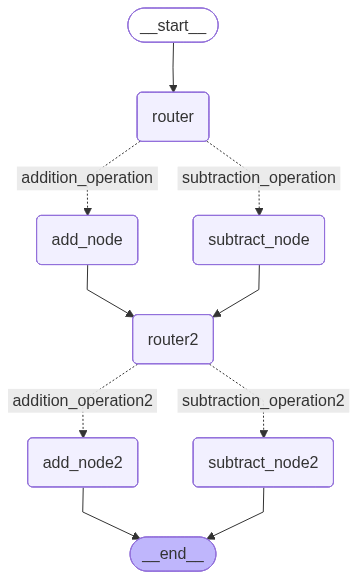

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
result = app.invoke({"number1": 25, "operation": "+", "number2": 20,"number3": 35, "operation2": "+", "number4": 20})
print(result)

{'number1': 25, 'operation': '+', 'number2': 20, 'number3': 35, 'operation2': '+', 'number4': 20, 'finalNumber': 45, 'finalNumber2': 55}
